In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

### Read data from preprocessed file

In [2]:
df = pd.read_csv("../data/internal/processed/IT Salary 2018_2019_2020_processed.csv")
df

,Year,Age,Gender,City,Position,Years of experience,Current level,Current Salary,Main language at work,Company size,Company type
0,2018,43.0,Male,München,QA Ingenieur,11.0,Senior,77000.0,Deutsch,100-1000,Product
1,2018,33.0,Female,München,Senior PHP Magento developer,8.0,Senior,65000.0,Deutsch,50-100,Product
2,2018,32.0,Male,München,Software Engineer,10.0,Senior,88000.0,Deutsch,1000+,Product
3,2018,25.0,Male,München,Senior Frontend Developer,6.0,Senior,78000.0,English,1000+,Product
4,2018,39.0,Male,München,UX Designer,10.0,Senior,69000.0,English,100-1000,Ecom retailer
...,...,...,...,...,...,...,...,...,...,...,...
2869,2020,31.0,Male,Berlin,Backend Developer,9.0,Senior,70000.0,English,51-100,Product
2870,2020,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10.0,Senior,60000.0,English,1000+,Product
2871,2020,39.0,Male,Munich,IT Operations Manager,15.0,Lead,110000.0,English,101-1000,eCommerce
2872,2020,26.0,Male,Saarbrücken,Frontend Developer,7.0,Middle,38350.0,German,101-1000,Product


# Question 1
## How are salaries distributed at different levels?
### Meaning
- Understand what levels there are in the IT field
- Know the distribution of salaries of each level
### Answering
    Using box plot to visualize the distribution of salaries of each level below:

#### #Preprocessing before visualize

In [9]:
# Convert positions equivalent to student to student
student_categorical = ['Working Student', 'student']
df['Current level'] = df['Current level'].replace(student_categorical,"Student")
df['Current level'] = df['Current level'].replace("intern","Intern")

# Convert positions equivalent to manager to manager
manager_categorical = ["Work Center Manager", 'C-level executive manager']
df['Current level'] = df['Current level'].replace(manager_categorical,"Manager")

# Delete non-existing levels
level_drop = ['No level', 'No level ', 'no idea, there are no ranges in the firm ', 'Key']
for value in level_drop:
    df = df.drop(df[df['Current level'] == value].index)


#### #Visualize

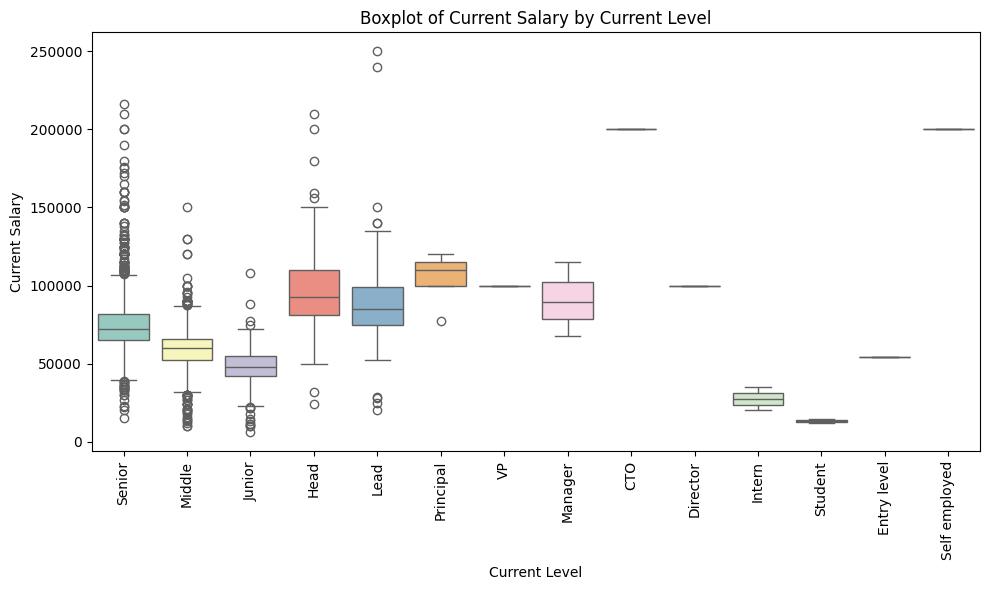

In [4]:
plt.figure(figsize=(10, 6))

# Use seaborn to draw boxplot according to 'Current Level' and 'Current Salary'
sns.boxplot(x='Current level', y='Current Salary', data=df , hue='Current level', palette='Set3')
plt.title('Boxplot of Current Salary by Current Level')
plt.xlabel('Current Level')
plt.ylabel('Current Salary')
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

We explain some current level:
- Principle: They are often senior technical experts responsible, so it can be understood as equivalent to senior.
- VP: Generally responsible for the design, development and implementation of organizational information systems, software applications, and IT support and infrastructure systems.

After visualize, i see:
- Senior level: Most salaries range from 70,000 to 80,000 per year, the highest is about 200,000 USD per year and the lowest is about 15,000 USD per year
- Middle level: Most salaries range from 50,000 to 65,000 per year, the highest is about 150,000 USD per year and the lowest is about 10,000 USD per year
- Junior level: Most salaries range from 50,000 to 65,000 per year, the highest is about 110,000 USD per year and the lowest is about 8,000 USD per year
- Head level: Most salaries range from 85,000 to 100,000 per year, the highest is about 180,000 USD per year and the lowest is about 25,000 USD per year
- Lead level: Most salaries range from 75,000 to 100,000 per year, the highest is about 150,000 USD per year and the lowest is about 23,000 USD per year

# Question 2
## What is the salary of data related positions in 2018-2020?
### Meaning
- Know the salary of data positions so that coders have more motivation in the data field
- If a person feels that this data position is not suitable, they can move to another position that is more suitable for data without having to learn too much about other things.
### Answering
    Using bar plot to visualize the distribution of salaries of each level below:

#### #Preprocessing before visualize

In [6]:
data_positions = df[df['Position'].str.contains('Data', case=False)]['Position'].unique()
data_positions = pd.Series(data_positions)
# Make a copy of  data_positions and convert to lower case
data_positions_lowercase = data_positions.str.lower().copy()

# Find 'engineer' with regex
engineer_positions = data_positions_lowercase[data_positions_lowercase.str.contains('engineer', regex=True, na=False)].unique().tolist()

data_engineer_replace = []
for value in data_positions:
    if value.lower() in engineer_positions:
        data_engineer_replace.append(value)

# Convert similar positions to the same format
# Convert positions equivalent to Data Engineer to Data Engineer
df['Position'] = df['Position'].replace(data_engineer_replace,"Data Engineer")

# Convert positions equivalent to Data Scientist to Data Scientist
data_scientist_replace = ["Data scientist", 'data scientist', 'Senior Data Scientist']
df['Position'] = df['Position'].replace(data_scientist_replace,"Data Scientist")
df['Position'] = df['Position'].replace('Data science team lead',"Data Science Team Lead")

# Convert positions equivalent to Data Analyst to Data Analyst
data_analyst_replace = ['Data analyst', 'Data analyst ', 'DB developer/Data analyst', 'Data Analyst ']
df['Position'] = df['Position'].replace(data_analyst_replace,'Data Analyst')



#### #Visualize

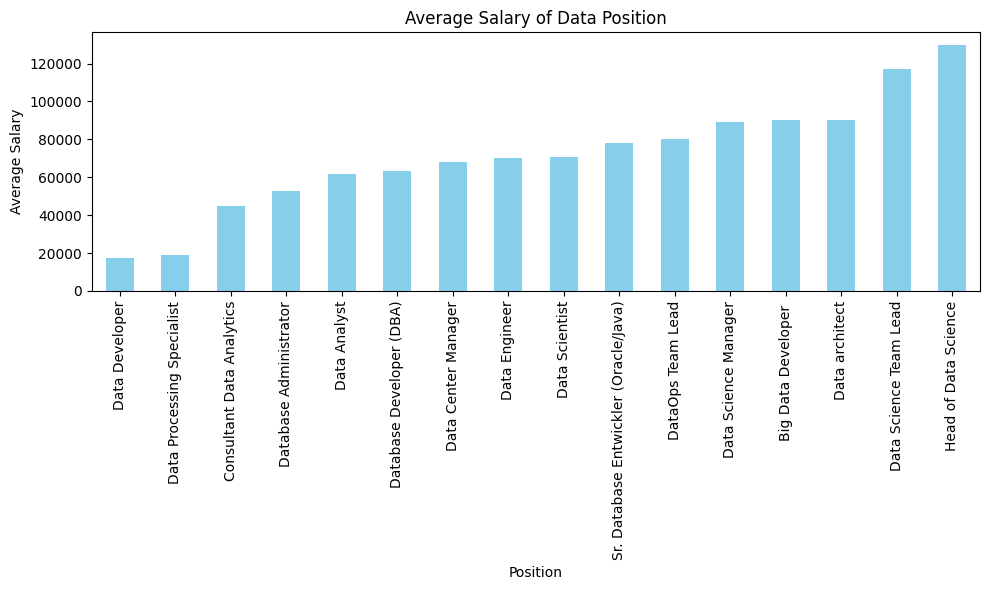

In [7]:

# Calculate the average salary for each position and save it into a Series
average_salary = df[df['Position'].isin(data_positions)].groupby('Position')['Current Salary'].mean().sort_values()

plt.figure(figsize=(10, 6))
average_salary.plot(kind='bar', color='skyblue')
plt.title('Average Salary of Data Position')
plt.xlabel('Position')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()